In [188]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [189]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import numpy as np

In [190]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [191]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [192]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [193]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [194]:
# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station

In [195]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [196]:
# Confirm table names using 'inspector'
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [197]:
# View the measurement class
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14ec52096d8>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [198]:
# View the station class
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14ec59d5c18>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1}

In [199]:
# Get a list of column names and types in measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [200]:
# Use the session to query measurement table and display the first 5 trade volumes
for row in session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).limit(5).all():
    print(row)

('USC00519397', '2010-01-01', 0.08, 65.0)
('USC00519397', '2010-01-02', 0.0, 63.0)
('USC00519397', '2010-01-03', 0.0, 74.0)
('USC00519397', '2010-01-04', 0.0, 76.0)
('USC00519397', '2010-01-06', None, 73.0)


In [201]:
# Get a list of column names and types in station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [202]:
# Use the session to query station table and display the first 5 trade volumes
for row in session.query(station.station, station.name, station.latitude, station.longitude, station.elevation).limit(5).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


In [203]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Climate Analysis

In [204]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [205]:
# Query the measurement class for the latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [206]:
# Query the measurement class for precipation data
# Filter to one (the most active) station 
# Filter to a 12 month data set ending on the latest available measurement date available
# View the data for better understanding, e.g. note the "None" instances in the dataset
session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date >= '2016-08-24' ).\
    order_by(Measurement.date).all()

[('USC00519397', '2016-08-24', 0.08),
 ('USC00519397', '2016-08-25', 0.08),
 ('USC00519397', '2016-08-26', 0.0),
 ('USC00519397', '2016-08-27', 0.0),
 ('USC00519397', '2016-08-28', 0.01),
 ('USC00519397', '2016-08-29', 0.0),
 ('USC00519397', '2016-08-30', 0.0),
 ('USC00519397', '2016-08-31', 0.13),
 ('USC00519397', '2016-09-01', 0.0),
 ('USC00519397', '2016-09-02', 0.0),
 ('USC00519397', '2016-09-03', 0.0),
 ('USC00519397', '2016-09-04', 0.03),
 ('USC00519397', '2016-09-05', None),
 ('USC00519397', '2016-09-06', None),
 ('USC00519397', '2016-09-07', 0.05),
 ('USC00519397', '2016-09-08', 0.0),
 ('USC00519397', '2016-09-09', 0.03),
 ('USC00519397', '2016-09-10', 0.0),
 ('USC00519397', '2016-09-11', 0.05),
 ('USC00519397', '2016-09-12', 0.0),
 ('USC00519397', '2016-09-13', 0.02),
 ('USC00519397', '2016-09-14', 1.32),
 ('USC00519397', '2016-09-15', 0.42),
 ('USC00519397', '2016-09-16', 0.06),
 ('USC00519397', '2016-09-17', 0.05),
 ('USC00519397', '2016-09-18', 0.0),
 ('USC00519397', '2016-

In [207]:
# Perform the above query and draft to a list for improved handling
results = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date >= '2016-08-24' ).\
    order_by(Measurement.date).all()

In [208]:
# Unpack the date and precipitation results and save into separate lists
x = [result[1] for result in results]
y = [result[2] for result in results]

In [209]:
# Save the query results as a Pandas DataFrame, set the index to the date column and sort by date
df = pd.DataFrame({"Date":x, "Precipitation":y}).sort_values(["Date"], ascending=True)
df2 = df.dropna(how="any")
df2.set_index("Date", inplace=True, )
df2.head(30)

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


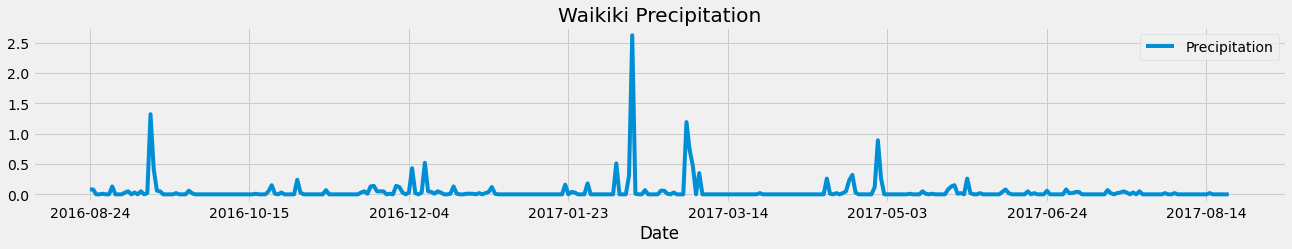

<Figure size 432x288 with 0 Axes>

In [210]:
# Use Pandas Plotting with Matplotlib to plot the data
df2.plot(kind="line", figsize=(20,3))
plt.title("Waikiki Precipitation")
plt.show()
plt.tight_layout()

In [211]:
# Use Pandas to calcualte the summary statistics for the precipitation data
average = df["Precipitation"].mean()
print(f"The average precipitation for the selected station is: {average} inches over the trailing 12 months")
median = df["Precipitation"].median()
print(f"The median precipitation for the selected station is: {median} inches over the trailing 12 months")
minimum = df["Precipitation"].min()
print(f"The lowest precipitation for the selected station is: {median} inches over the trailing 12 months")
maximum = df["Precipitation"].max()
print(f"The highest precipitation for the selected station is: {median} inches over the trailing 12 months")

The average precipitation for the selected station is: 0.04494413407821229 inches over the trailing 12 months
The median precipitation for the selected station is: 0.0 inches over the trailing 12 months
The lowest precipitation for the selected station is: 0.0 inches over the trailing 12 months
The highest precipitation for the selected station is: 0.0 inches over the trailing 12 months


In [212]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [213]:
# What are the most active stations? (i.e. what stations have the most temperature observations)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    filter(Measurement.date >= '2016-08-24' ).\
    order_by(func.count(Measurement.date).desc()).all()   
print(active)


#Alternate (earlier) path but used Pandas to get desired output
# active = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
#     filter(Measurement.date >= '2016-08-24' ).\
#     order_by(Measurement.date).all()
# xx = [result[0] for result in active]
# yy = [result[2] for result in active]
# active1 = pd.DataFrame({"Station":xx, "Temperature":yy}).sort_values(["Station"], ascending=True)
# #active2 = active1[active1["Temperature"] != "None"]
# active2 = active1.dropna(how="any")
# active3 = active2.groupby(["Station"]).count()["Temperature"].rename("Active Temperature Observations").sort_values(ascending=False)
# active3.head(30)

[('USC00519397', 360), ('USC00519281', 351), ('USC00516128', 348), ('USC00513117', 342), ('USC00519523', 336), ('USC00514830', 304), ('USC00517948', 182)]


In [214]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
templ = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date >= '2016-08-24' ).\
    order_by(Measurement.date).all()
print(templ)



[(60.0, 87.0, 75.19444444444444)]


In [215]:
#Alternate (earlier) path but used Pandas to get desired output
templ = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519397').\
    filter(Measurement.date >= '2016-08-24' ).\
    order_by(Measurement.date).all()
xl = [alpha[0] for alpha in templ]
yl = [alpha[2] for alpha in templ]
temp1 = pd.DataFrame({"Station":xl, "Temperature":yl})
#active2 = active1[active1["Temperature"] != "None"]
temp2 = temp1.dropna(how="any")
temp3 = temp2.groupby(["Station"]).min()["Temperature"].rename("Lowest Temperature - Trailing 12 months").sort_values(ascending=False)
print(temp3)
temp4 = temp2.groupby(["Station"]).max()["Temperature"].rename("Highest Temperature - Trailing 12 months").sort_values(ascending=False)
print(temp4)
temp5 = temp2.groupby(["Station"]).mean()["Temperature"].rename("Average Temperature - Trailing 12 months").sort_values(ascending=False)
print(temp5)

Station
USC00519397    60.0
Name: Lowest Temperature - Trailing 12 months, dtype: float64
Station
USC00519397    87.0
Name: Highest Temperature - Trailing 12 months, dtype: float64
Station
USC00519397    75.194444
Name: Average Temperature - Trailing 12 months, dtype: float64


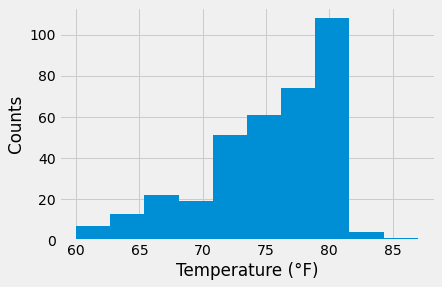

In [216]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = temp2["Temperature"]
plt.hist(histogram, bins=10)
#plt.hist(histogram)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()

## Bonus Challenge Assignment

In [217]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [218]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-03-01', '2017-03-23'))

[(62.0, 71.57142857142857, 82.0)]


In [219]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Unpack the date and precipitation results and save into separate lists

# Unclear what the ask here is v. the sample charts
start_date = '2017-03-01'
end_date = '2017-03-23'
vacation = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519397').\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

xv = [result[0] for result in vacation]
yv = [result[1] for result in vacation]
zv = [result[1] for result in vacation]

vacation2 = pd.DataFrame({"Low":xv, "Average":yv,"High":zv})
vacation2.head()

,Low,Average,High
0,66.0,71.173913,71.173913


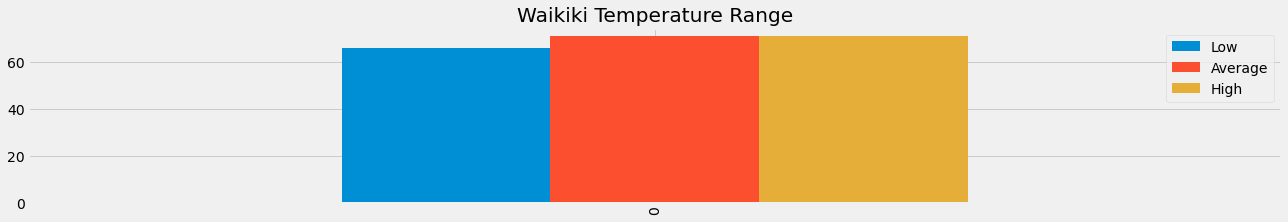

<Figure size 432x288 with 0 Axes>

In [220]:
# Use Pandas Plotting with Matplotlib to plot the data
vacation2.plot(kind="bar", figsize=(20,3))
plt.title("Waikiki Temperature Range")
plt.show()
plt.tight_layout()

In [221]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Unpack the date and precipitation results and save into separate lists

# Unclear what the ask here is v. the sample charts
start_date = '2017-03-01'
end_date = '2017-03-23'
rainey = session.query(func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)).\
        filter(Measurement.station == 'USC00519397').\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

xr = [result[0] for result in rainey]
yr = [result[1] for result in rainey]
zr = [result[1] for result in rainey]

rainey2 = pd.DataFrame({"Low":xr, "Average":yr,"High":zr})
rainey2.head()

,Low,Average,High
0,0.0,0.11913,0.11913


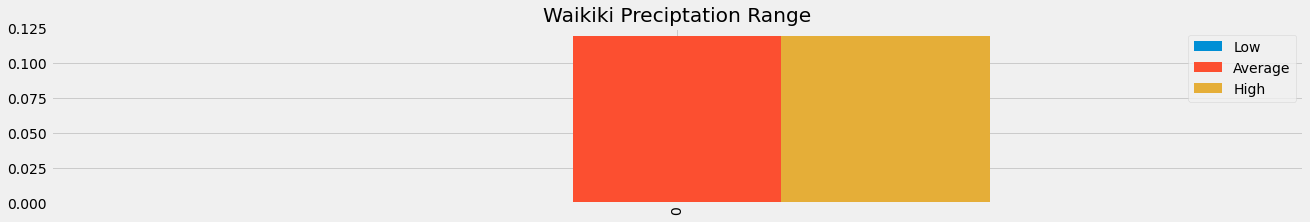

<Figure size 432x288 with 0 Axes>

In [229]:
# Use Pandas Plotting with Matplotlib to plot the data
rainey2.plot(kind="bar", figsize=(20,3))
plt.title("Waikiki Preciptation Range")
plt.show()
plt.tight_layout()

In [223]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# This attempt works and then doesn't work. Keeps blowing up my notebook so commenting out. 
# And does not meet challenge specifications.

# match = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

# for record in match:
#     (Measurement, Station) = record
#     print(Station.station)
#     print(Station.name)
#     print(Station.latitude)
#     print(Station.longitude)
#     print(Station.elevation)
    

USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0
USC00519397
WAIKIKI 717.2, HI US
21.2716
-157.8168
3.0


In [225]:
# match2 = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

# for recordtwo in match2:
#     (Measurement, Station) = recordtwo
#     print(Station.station)
#     print(Station.name)
#     print(Station.latitude)
#     print(Station.longitude)
#     print(Station.elevation)

In [228]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(None, None, None)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
